# Euler Modificado 2nd ODE

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Graficar

In [2]:
def graficar(x_values, y_values):
    plt.plot(x_values, y_values,label='Euler modificado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Solving ODE using Euler's Method")
    plt.legend()
    plt.grid(True)
    plt.show()

## Euler simple

In [3]:
def euler_simp_p(f, xi, yi, ypi):
    p = f(xi, yi, ypi)
    return p

## Euler modificado

In [4]:
def euler_modif_p(f1,f2, x, y, yp, h):
    ymit = y + f1(x,y,yp) * h/2
    ypmit = yp + f2(x,y,yp) * h/2
    yppendienteMitad = f2(x+(h/2), ymit, ypmit) #ypmit por completes, pero no nec en este caso
    ypendienteMitad = f1(x+(h/2), ymit, ypmit)  #dude si ypmit o yppend... pero si ypmit por analisis!
    return ypendienteMitad,yppendienteMitad

## Obtener Valores

In [5]:
def obtenerValores(f1,f2,t0,x0,v0,h,n):
    t_values = np.zeros(n+1);    #x es la var independiente (t)
    x_values = np.zeros(n+1);    #y es la var dependiente (x)
    v_values = np.zeros(n+1);
    t_values[0]=t0  #solo se hacerlo con condiciones iniciales hasta ahora... (no Ec dif con condic de frontera)
    x_values[0]=x0
    v_values[0]=v0
    
    for i in range(1,n+1):
        t_values[i] = t_values[i-1] + h
        #v_values[i] = f1(f2,t_values[i-1],x_values[i-1],v_values[i-1],h)
        #v_values[i] =   #pero seria valor de v a la mitad...
        #x_values[i] = x_values[i-1] + euler_modif_p_x(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1]) * h #MAL! le estaba mandando la pendiente de v punto
        #v_values[i] = v_values[i-1] + euler_modif_p_v(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1],x_values[i]) * h
        xpendMit,vpendMit = euler_modif_p(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1],h)
        x_values[i] = x_values[i-1] + xpendMit * h
        v_values[i] = v_values[i-1] + vpendMit * h
    
    return t_values,x_values,v_values

## Main

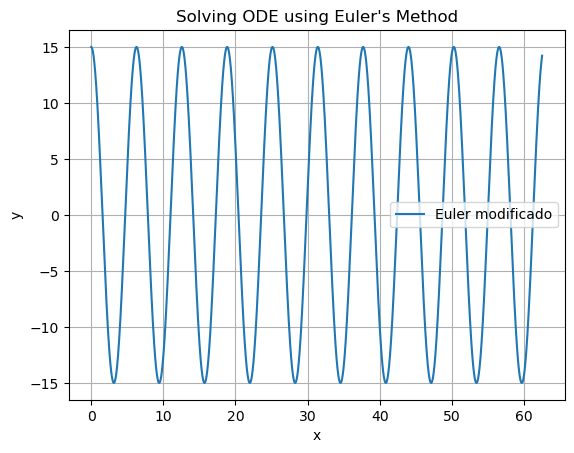

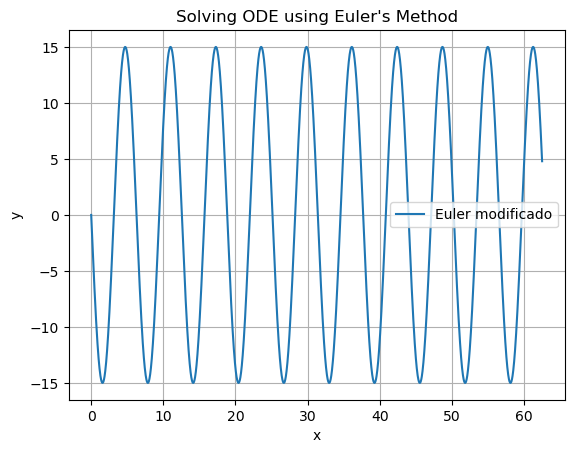

In [30]:
#Valores - Parametros - Condiciones
t0 = 0    #TODAVIA NO SE como resolver SI lo que TENGO son CONDICIONES DE FRONTERA... (solo si se si tengo condic iniciales)
x0 = 15
v0 = 0     
k = .2
m = .2
D = .02
h = .025
n = 2500

#Funcion
def f1(t,x,v):     #x punto = V     #IDEALMENTE creo igual se tendria que mandar ctes (k,m,D) a estas funciones no???
    return v
def f2(t,x,v):       #v punto   #PROGRAMA NO SOPORTA QUE f2 dependa de x punto/vel
    #return -(k/m)*x   #SHM
    #return -(k/m)*x - (D/m)*v   #Dammped SHM
    return -(k/m)*x #+ f3(t) #- (D/m)*v



def f3(t): 
    A = .2
    w0 = np.sqrt(k/m)
    phi = 0
    
    return A*np.cos(w0*t+phi)

# Resolver
t_values, x_values, v_values = obtenerValores(f1, f2, t0, x0, v0, h, n)  #faltan los v_values... que se vayan guardando (siento que casi solo me enrrende y en realidad si nec primero obt p, aunque no, porque en met mas comp, creo nec mandar x(pos, no t en este caso) de en medio y justo no la tienes!)

# Plot the solution
#label = 'ODE Euler Modificado'
graficar(t_values, x_values)
graficar(t_values, v_values)

## Grafica y Analisis del error

In [44]:
meanAbsoluteErrorList = []   #solo correrlo al inicio

In [45]:
def valorDeFuncion(x,k,m):
    valor = 5*np.cos(x*np.sqrt(k/m)) #w = k/m
    return valor

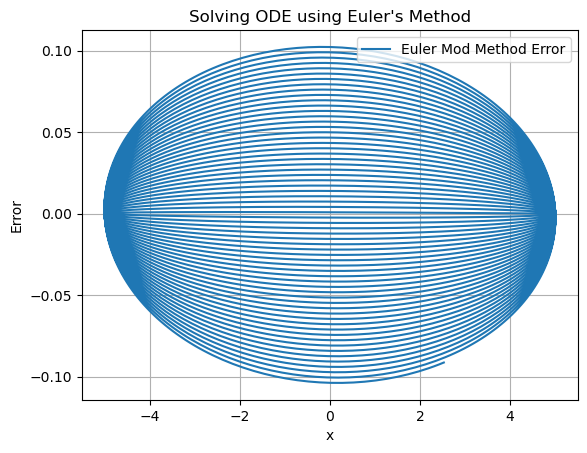

In [46]:
#Grafica del error en func de x
k =.2
m = .2
listRealValues = []
listErrors = []
for i in range (0,n+1):
    #print(x_values[i])
    #print(y_values[i])
    valorReal = valorDeFuncion(t_values[i],k,m)
    listRealValues.append(valorReal)
    listErrors.append(valorReal-x_values[i])
#print(listRealValues)
arrayRealValues = np.array(listRealValues)
#print(arrayRealValues)
arrayErrorValues = np.array(listErrors)
#print(arrayErrorValues)

# Plot the solution
plt.plot(x_values, arrayErrorValues, label='Euler Mod Method Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title("Solving ODE using Euler's Method")
plt.legend()
plt.grid(True)
plt.show()

#Mean Absolute Error
meanAbsoluteError = np.mean(np.abs(arrayErrorValues))
meanAbsoluteErrorList.append(meanAbsoluteError)



In [47]:
print(meanAbsoluteErrorList)

[0.033246894667387866]


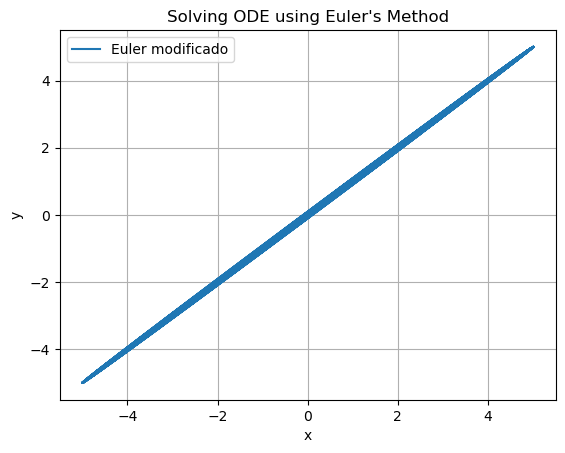

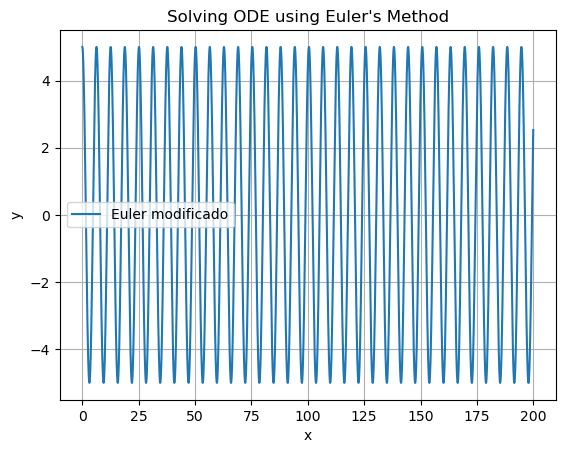

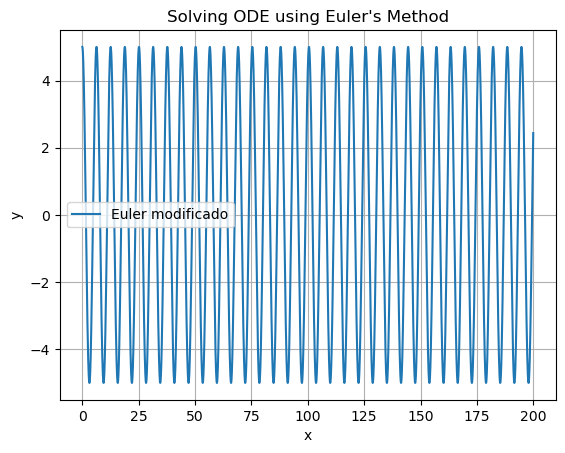

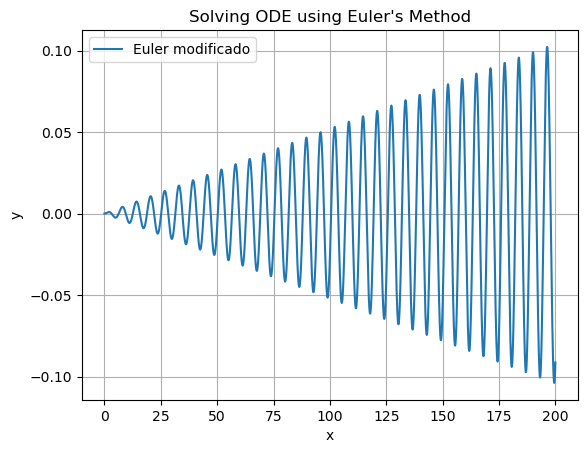

In [48]:
graficar(x_values, arrayRealValues) #se ve el error. Ideal linea recta pendiente 1
graficar(t_values, x_values)
graficar(t_values,arrayRealValues)
graficar(t_values, arrayErrorValues)


## Extra 

### Error curioso que estaba haciendo en los siguientes dos cuadros

In [4]:
def euler_modif_p_x(f1,f2, x, y, yp):
    ymit = y + f1(x,y,yp) * h/2  #f1 = yp = v anterior
    #pendienteMitad = f2(x+(h/2), ymit) #no soporta que f2 dep de yp, no tiene forma de saber ypmit! (seria creo ciclica...)
    pendienteMitad = f1(x+(h/2), ymit, ypmit) #no tengo ypmit aun!  (f1 aparte solo regresaria ypmit!!!)
    return pendienteMitad

In [5]:
def euler_modif_p_v(f1,f2, x, y, yp):
    ypmit = yp + f2(x,y) * h/2 
    pendienteMitad = f2(x+(h/2), ymit) #pero aun no tengo ymit!!!(seria creo ciclica...)
    return pendienteMitad